In [2]:
import pygrib
import xarray as xr

In [2]:
file = "./CovidData/testGrib.grib"
gr = pygrib.open(file)

In [3]:
ds = xr.open_dataset("./CovidData/ERA5-Reanalysis.grib", engine="cfgrib")
#ds = xr.tutorial.load_dataset("./CovidData/testGrib.grib", engine="cfgrib")

In [4]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 28, longitude: 36, time: 1184)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2019-01-01T15:00:00 ... 2022-03-29T15:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 41.55 41.3 41.05 40.8 ... 35.3 35.05 34.8
  * longitude   (longitude) float64 19.37 19.62 19.87 ... 27.62 27.87 28.12
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-04T10:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [57]:
ds = ds.resample(time='1D').mean(dim='time', skipna=None)

## Prefecture Analysis

In [59]:
import cartopy.io.shapereader as shpreader
import shapely.vectorized
import pandas as pd
import numpy as np

prefecture = 'C:\Programming\Snap\s5p\shp\prefecture.shp'
reader = shpreader.Reader(prefecture)
records = list(reader.records())

pd.DataFrame([entry.attributes for entry in records])

,PARENT,ESYE_ID,NAME_GR,NAME_ENG,pop,EDRA,shape_leng,shape_area
0,61000000,61000000,?. ???????,N. PIERIAS,126412.0,????????,273982.70,1.521683e+09
1,97000000,97000000,?. ??????? ???????,N. DYTIKIS ATTIKIS,149794.0,????????,226024.53,1.004945e+09
2,33000000,33000000,?. ?????????,N. IOANNINON,161027.0,????????,459160.75,4.999037e+09
3,59000000,59000000,?. ??????,N. PELLAS,143957.0,??????,323924.97,2.505800e+09
4,05000000,05000000,?. ??????????,N. EVRYTANIAS,19518.0,?????????,267851.30,1.870664e+09
5,07000000,07000000,?. ???????,N. FOKIDAS,37866.0,???????,357885.44,2.126379e+09
6,01000000,01000000,?. ????????????????,N. ETOLOAKARNANIAS,219092.0,?????????,905135.50,5.425151e+09
7,42000000,42000000,?. ???????,N. LARISAS,282156.0,??????,479120.03,5.385277e+09
8,16000000,16000000,?. ????????,N. LAKONIAS,92811.0,??????,622035.70,3.636384e+09
9,91000000,91000000,?. ?????????,N. IRAKLIOU,291225.0,????????,349691.72,2.634600e+09


In [9]:
from itertools import product, cycle

points = list(product(ds.latitude.values, ds.longitude.values))
x = [i for j, i in points]
y = [j for j, i in points]

In [65]:
name_temp=''
for index,region in enumerate(records):
    name_temp = list(region.attributes.keys())
    break
name_temp = name_temp[3]
print(name_temp)

['PARENT', 'ESYE_ID', 'NAME_GR', 'NAME_ENG', 'pop', 'EDRA', 'shape_leng', 'shape_area']
NAME_ENG


In [73]:
#From the above cell
NAME_ATTR = name_temp
#x has latitude , y has longitude
masked_data=None
mask_array=None
totalData=[]
for index, region in enumerate(records):
    mask = shapely.vectorized.contains(region.geometry, x, y).reshape(
        (ds.latitude.shape[0], ds.longitude.shape[0]))
    

    if np.any(mask):
        print("Processing {region}".format(region=region.attributes[NAME_ATTR]))
        mask_array = xr.DataArray(mask, dims=('latitude', 'longitude'),
                                      coords={'longitude': ds.longitude, 'latitude': ds.latitude})
        #print(mask_array)
        
        #masked_data = ds.mean(dim='time').where(mask_array, drop=True)
        masked_data = ds.where(mask_array,drop=True)
        totalData.append((region,masked_data))
    else:
        print("{region} does not intersect AOI".format(region=region.attributes[NAME_ATTR]))

Processing N. PIERIAS
Processing N. DYTIKIS ATTIKIS
Processing N. IOANNINON
Processing N. PELLAS
Processing N. EVRYTANIAS
Processing N. FOKIDAS
Processing N. ETOLOAKARNANIAS
Processing N. LARISAS
Processing N. LAKONIAS
Processing N. IRAKLIOU
Processing N. EVROU
N. SAMOU does not intersect AOI
Processing N. PIREOS KE NISON
Processing N. CHALKIDIKIS
Processing N. SERRON
Processing N. KOZANIS
Processing N. IMATHIAS
Processing N. FTHIOTIDAS
Processing N. CHIOU
Processing N. ACHAIAS
Processing N. FLORINAS
Processing N. PREVEZAS
Processing N. EVVIAS
Processing N. GREVENON
Processing N. ATHINON
Processing N. ANATOLIKIS ATTIKIS
N. KEFALLONIAS does not intersect AOI
Processing N. RODOPIS
Processing N. KORINTHOU
Processing N. CHANION
Processing N. LESVOU
Processing N. ARKADIAS
Processing N. KASTORIAS
Processing N. ZAKYNTHOU
Processing N. DRAMAS
Processing N. KYKLADON
N. LEFKADAS does not intersect AOI
Processing N. VIOTIAS
Processing N. LASITHIOU
Processing N. RETHYMNOU
Processing N. MAGNISIAS
P

In [140]:
VARIABLE = 'u10'
VARIABLE1 = 'v10'
VARIABLE2 = 't2m'
u10=[]
v10=[]
t2m=[]
time = []
nomos=[]
for region,data in totalData:
    for d in data[VARIABLE]:        
        #Keep the date
        string = str(d.time.values)
        string = string[0:10]
        
        time.append(string)
        #Region 
        reg = region.attributes[NAME_ATTR]
        nomos.append(reg)
        #Mean value of u-speed
        meanU = np.nanmean(d.values.flatten())
    
        u10.append(meanU)
        if meanU:
            continue
        else:
            print(d.values)
            
    for d in data[VARIABLE1]:
        v10.append(np.nanmean(d.values.flatten()))
    for d in data[VARIABLE2]:
        t2m.append(np.nanmean(d.values.flatten()))        

"\n\ndf = pd.DataFrame(list(zip(lst, lst2)),\n               columns =['Name', 'val'])\n"

In [141]:
df = pd.DataFrame(list(zip(time,nomos,u10,v10,t2m)),columns=['Time','Region','u10','v10','t2m'])

In [142]:
df.to_csv('E:\CovidData\ERA5\ERA5-Reanalysis.csv',index=False)

## Urban Areas Analysis

In [143]:
#Astikes Perioxes Analysis

import cartopy.io.shapereader as shpreader
import shapely.vectorized

astikesPerioxes = 'C:\Programming\Snap\s5p\shp1\PERIFEREIES_ELLADAS.shp'
reader = shpreader.Reader(astikesPerioxes)
records = list(reader.records())

pd.DataFrame([entry.attributes for entry in records])

,OBJECTID,KALCODE,LEKTIKO
0,1,111,ΠΕΡΙΦΕΡΕΙΑ ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ
1,2,112,ΠΕΡΙΦΕΡΕΙΑ ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
2,3,121,ΠΕΡΙΦΕΡΕΙΑ ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
3,4,122,ΠΕΡΙΦΕΡΕΙΑ ΗΠΕΙΡΟΥ
4,5,231,ΠΕΡΙΦΕΡΕΙΑ ΘΕΣΣΑΛΙΑΣ
5,6,232,ΠΕΡΙΦΕΡΕΙΑ ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ
6,7,241,ΠΕΡΙΦΕΡΕΙΑ ΙΟΝΙΩΝ ΝΗΣΩΝ
7,8,242,ΠΕΡΙΦΕΡΕΙΑ ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ
8,9,243,ΠΕΡΙΦΕΡΕΙΑ ΠΕΛΟΠΟΝΝΗΣΟΥ
9,10,351,ΠΕΡΙΦΕΡΕΙΑ ΑΤΤΙΚΗΣ


In [144]:
from itertools import product, cycle

points = list(product(ds.latitude.values, ds.longitude.values))
x = [i for j, i in points]
y = [j for j, i in points]

In [146]:
NAME_ATTR = 'LEKTIKO'
#x has latitude , y has longitude
masked_data=None
mask_array=None
totalData=[]
for index, region in enumerate(records):
    mask = shapely.vectorized.contains(region.geometry, x, y).reshape(
        (ds.latitude.shape[0], ds.longitude.shape[0]))
    

    if np.any(mask):
        print("Processing {region}".format(region=region.attributes[NAME_ATTR]))
        mask_array = xr.DataArray(mask, dims=('latitude', 'longitude'),
                                      coords={'longitude': ds.longitude, 'latitude': ds.latitude})
        #print(mask_array)
        
        #masked_data = ds.mean(dim='time').where(mask_array, drop=True)
        masked_data = ds.where(mask_array,drop=True)
        totalData.append((region,masked_data))
    else:
        print("{region} does not intersect AOI".format(region=region.attributes[NAME_ATTR]))

Processing ΠΕΡΙΦΕΡΕΙΑ ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΗΠΕΙΡΟΥ
Processing ΠΕΡΙΦΕΡΕΙΑ ΘΕΣΣΑΛΙΑΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΙΟΝΙΩΝ ΝΗΣΩΝ
Processing ΠΕΡΙΦΕΡΕΙΑ ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΠΕΛΟΠΟΝΝΗΣΟΥ
Processing ΠΕΡΙΦΕΡΕΙΑ ΑΤΤΙΚΗΣ
Processing ΠΕΡΙΦΕΡΕΙΑ ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ
Processing ΠΕΡΙΦΕΡΕΙΑ ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ
Processing ΠΕΡΙΦΕΡΕΙΑ ΚΡΗΤΗΣ
Processing Άγιο Όρος (Αυτοδιοίκητο)


In [151]:
VARIABLE = 'u10'
VARIABLE1 = 'v10'
VARIABLE2 = 't2m'
tempu10=[]
tempv10=[]
tempt2m=[]
tempNomos=[]
tempTime=[]
for region,data in totalData:
    for d in data[VARIABLE]:
        #Keep the date
        string = str(d.time.values)
        string = string[0:10]
        
        tempTime.append(string)
        #Region 
        reg = region.attributes['LEKTIKO']
        tempNomos.append(reg)
        #Mean value of u-speed
        meanU = np.nanmean(d.values.flatten())
        
        tempu10.append(meanU)
        if meanU:
            continue
        else:
            print(d.values)
            
    for d in data[VARIABLE1]:
        tempv10.append(np.nanmean(d.values.flatten()))
    for d in data[VARIABLE2]:
        tempt2m.append(np.nanmean(d.values.flatten()))

In [154]:
df = pd.DataFrame(list(zip(tempTime,tempNomos,tempu10,tempv10,tempt2m)),columns=['Time','Region','u10','v10','t2m'])

In [155]:
df.to_csv('E:\CovidData\ERA5\ERA5-Reanalysis-Urban.csv',index=False)

## Measurement Depiction

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [6]:
shpFile = gpd.read_file('C:\Programming\Snap\s5p\shp\prefecture.shp')

<AxesSubplot:>

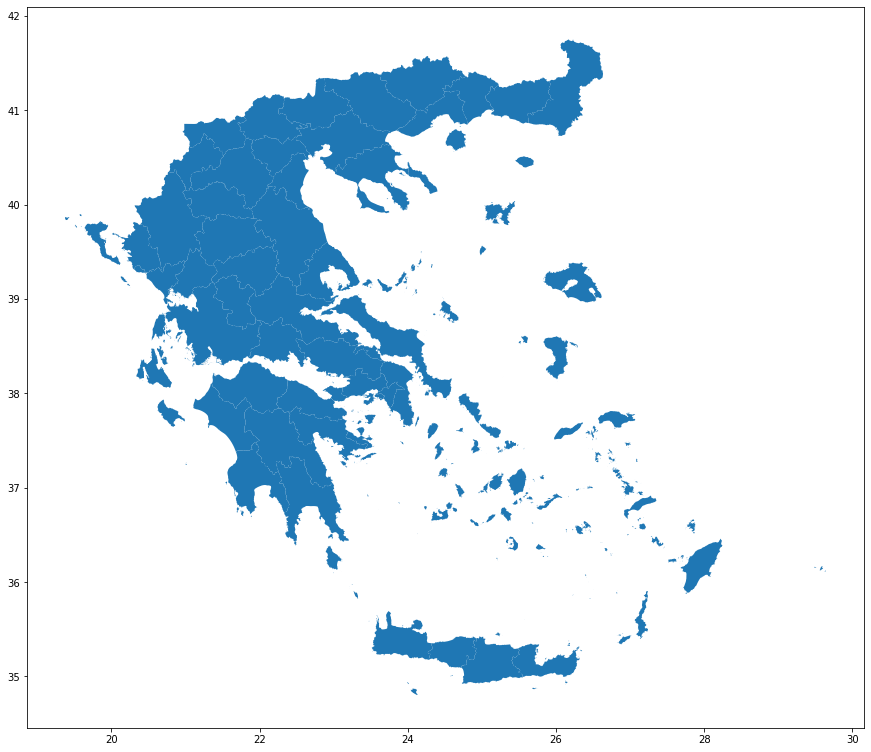

In [7]:
fig,ax = plt.subplots(figsize=(15,15))
shpFile.plot(ax=ax)

In [10]:
points = list(product(ds.longitude.values, ds.latitude.values))

In [13]:
crs={'init':'epsg:4326'}
df = pd.DataFrame()

In [14]:
geom =[]
for (x,y) in points:
    geom.append(Point(x,y))

In [15]:
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geom)

C:\Users\razkey\Anaconda3\envs\s5p\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

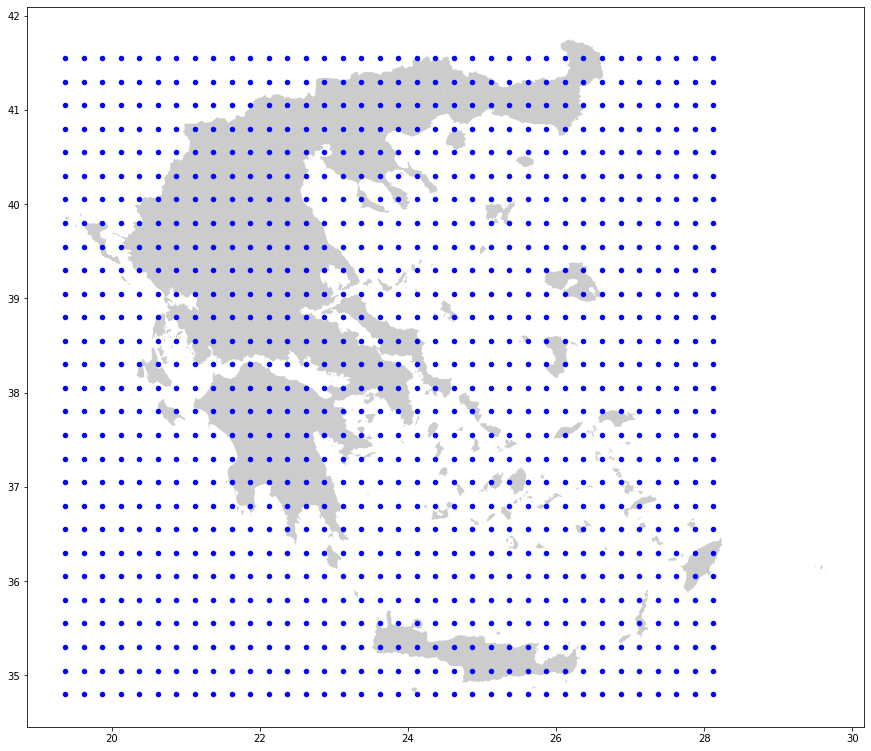

In [16]:
fig,ax = plt.subplots(figsize=(15,15))
shpFile.plot(ax=ax,alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')